In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Задание №0
### Метод моментов
Используя метод моментов с пробными функциями $g(x) = x^{k}$, $k \in N$, оценить параметр $\theta$ 
<ul>
    <li>равномерного распределения $U[0, \theta] = \theta \cdot U[0, 1]$ </li>
    <li>экспоненциального распределения $Exp(\theta) = \theta \cdot Exp(1)$</li>
</ul>

### Нормальное распределение

$EX_1^k = \int_{0}^{\theta}x^{k}\frac{1}{\theta}dx = \frac{x^{k+1}}{k+1}\frac{1}{\theta}\Biggr|_{0}^{\theta}=\frac{\theta^{k+1}}{k+1}\frac{1}{\theta}=\frac{\theta^{k}}{k+1}\Rightarrow$
$EX_1^k = \frac{\theta^{k}}{k+1} \Rightarrow$ 

$\theta^{k} = (k+1) EX_1^k \Rightarrow$ $\theta=\sqrt[k]{(k+1) EX_1^k}$

$\theta_k^*=\sqrt[k]{(k+1) \bar{X_1^k}}$

### Показательное распределение

$$EX_1^k = \int_{0}^{\infty}x^{k}e^{-\frac{x}{\theta}}dx = \theta^{k}\int_{0}^{\infty} x^{k+1}e^{-x}dx=\theta^{k}Г(k+1) = \theta^{k}\cdot k! \Rightarrow EX_1^k =  \theta^{k}\cdot k! \Rightarrow 
\theta^{k} = \frac{EX_1^k}{k!} \Rightarrow
\theta = \sqrt[k]{\frac{EX_1^k}{k!}}$$
$$\theta_k^*=\sqrt[k]{\frac{\bar{X_1^k}}{k!}}$$


## Задание №1
### Среднеквадратичное отклонение (СКО) построенных оценок



#### Нормальное распределение 

In [50]:
def uniform_estimate(theta, number_of_samples, number_of_elements_in_one_sample, k_max):
    error = []
    for k in range(1, k_max + 1):
        sum_of_errors = 0
        for i in range(1, number_of_samples + 1):
            one_sample = np.random.uniform(0, theta, size = number_of_elements_in_one_sample)
            element_power_k = 0
            for element in one_sample:
                element_power_k += element ** k
            theta_method_of_moments = (((element_power_k / number_of_elements_in_one_sample)) * (k + 1)) ** (1 / k)
            sum_of_errors += ((theta_method_of_moments - theta) ** 2)
        error.append(sum_of_errors / number_of_samples)
    return error          
    

Text(0.5, 1.0, 'Uniform distribution')

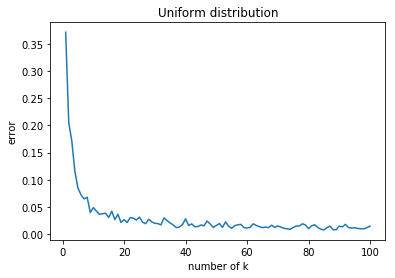

In [57]:
plt.plot(np.linspace(1, 100, 100), uniform_estimate(10, 100, 100, 100))
plt.xlabel("number of k")
plt.ylabel("error")
plt.title("Uniform distribution")

#### Показательное распределение

In [59]:
def exponential_estimate(theta, number_of_samples, number_of_elements_in_one_sample, k_max):
    error = []
    for k in range(1, k_max + 1):
        sum_of_errors = 0
        for i in range(1, number_of_samples + 1):
            one_sample = np.random.exponential(theta, size = number_of_elements_in_one_sample)
            element_power_k = 0
            for element in one_sample:
                element_power_k += element ** k
            theta_method_of_moments = ((element_power_k / number_of_elements_in_one_sample) / math.factorial(k))**(1 / k)
            sum_of_errors += ((theta_method_of_moments - theta) ** 2)
        error.append(sum_of_errors / number_of_samples)
    return error    

Text(0.5, 1.0, 'Exponential distribution')

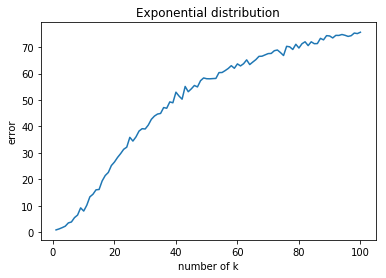

In [60]:
plt.plot(np.linspace(1, 100, 100), exponential_estimate(10, 100, 100, 100))
plt.xlabel("number of k")
plt.ylabel("error")
plt.title("Exponential distribution")

Для равномерно распределения: с возрастанием $k$ СКО уменьшается, однако уже между значениями $k$ от $20$ до $40$ видно, что СКО остается примерно на одном уровне.

Для показательного распределения: чем меньше  $k$, тем СКО меньше